## Exploration of data set

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from calc_observables import *
figwidth = 6.224
golden_ratio = 1.61803
figsize = (figwidth, figwidth / golden_ratio)
import matplotlib as mpl
# plt.style.use('seaborn-white')
sns.set_style("ticks")
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['figure.figsize'] = figsize

PATH = '.\\data\\'


In [6]:
%matplotlib inline

In [7]:
# df = pd.read_csv(PATH+'full_grouped.csv', parse_dates =["Date"])  # dataset from kaggle: https://www.kaggle.com/imdevskp/corona-virus-report
df = pd.read_csv(PATH+'covid_19_data.csv', parse_dates =["ObservationDate", 'Last Update'])  # more up-to-date dataset from kaggle: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

In [8]:
interesting_countries = ['US', 'Italy', 'Germany', 'France', 'United Kingdom', 'Switzerland', 'Austria', 'Sweden',
                         'Russia', ]
populations = pd.read_csv(PATH+'worldometer_data.csv', index_col='Country/Region', delimiter=';')['Population'] # get info on population from worldometer
df.rename(columns={'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)
df = df.loc[df['Country'].isin(interesting_countries)].reset_index()
df.drop(['Last Update', 'Province/State', 'SNo'], axis=1, inplace=True)

In [9]:
df = df.groupby(['Country', 'Date']).agg(sum).reset_index().drop(['index'], axis=1)

In [10]:
df['New cases'] = df.groupby('Country')['Confirmed'].diff()

In [11]:
calc_observables(df, populations)

C:\Users\simon\PycharmProjects\covidnetwork\calc_observables.py:34: RuntimeWarning: divide by zero encountered in true_divide
  R[tlag:] = active[tlag:] / active[:-tlag]
C:\Users\simon\PycharmProjects\covidnetwork\calc_observables.py:34: RuntimeWarning: invalid value encountered in true_divide
  R[tlag:] = active[tlag:] / active[:-tlag]


In [12]:
df.head()

,Country,Date,Confirmed,Deaths,Recovered,New cases,Confirmed pm,New cases pm,Mean new cases,Mean new cases pm,Population,Shifted Date,Shifted Date pm,R
0,Austria,2020-02-25,2.0,0.0,0.0,NaN,0.221937,NaN,NaN,NaN,9011577.0,-16,-8,0.0
1,Austria,2020-02-26,2.0,0.0,0.0,0.0,0.221937,0.000000,NaN,NaN,9011577.0,-15,-7,0.0
2,Austria,2020-02-27,3.0,0.0,0.0,1.0,0.332905,0.110968,NaN,NaN,9011577.0,-14,-6,0.0
3,Austria,2020-02-28,3.0,0.0,0.0,0.0,0.332905,0.000000,NaN,NaN,9011577.0,-13,-5,0.0
4,Austria,2020-02-29,9.0,0.0,0.0,6.0,0.998715,0.665810,2.714286,0.3012,9011577.0,-12,-4,0.0


(1, 151622.26749021962)

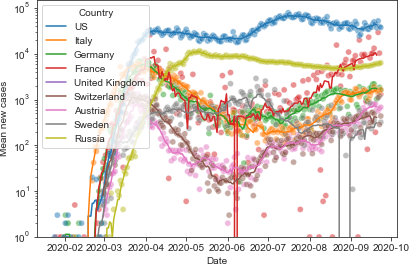

In [13]:
sns.lineplot(data=df, x='Date', y='Mean new cases', hue='Country', hue_order=interesting_countries, ci=None,
            legend='brief')
sns.scatterplot(data=df, x='Date', y='New cases', hue='Country', hue_order=interesting_countries, ci=None,
            legend=False, linewidths=0, alpha=0.5)
plt.yscale('log')
plt.ylim(1)

(1, 391.45609677958214)

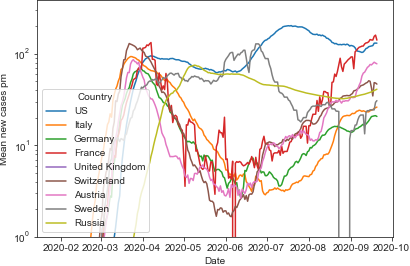

In [14]:
# sb.lineplot(data=df, x='Date', y='Active', hue='Country', hue_order=interesting_countries, estimator=sum, ci=None)
sns.lineplot(data=df, x='Date', y='Mean new cases pm', hue='Country', hue_order=interesting_countries, ci=None,
            legend='brief')
# sb.scatterplot(data=df, x='Date', y='New cases pm', hue='Country', hue_order=interesting_countries, ci=None,
#             legend=False, linewidths=0, alpha=0.5)
plt.yscale('log')
plt.ylim(1)

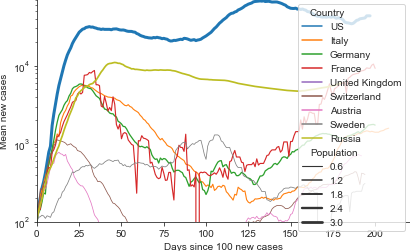

In [15]:
sns.lineplot(data=df.loc[df['Country'].isin(interesting_countries)], x='Shifted Date', y='Mean new cases', hue='Country',
            hue_order=interesting_countries, estimator=sum, ci=None, size='Population')
plt.xlim(0)
plt.xlabel('Days since 100 new cases')
plt.ylabel('Mean new cases')
plt.ylim(100)
plt.yscale('log')

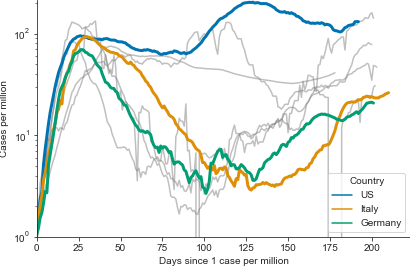

In [16]:
coloredcountries = interesting_countries[:3]
graycountries = interesting_countries[3:]
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', linewidth=3, palette='colorblind',
            y='Mean new cases pm', hue='Country', hue_order=coloredcountries, estimator=sum, ci=None)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Mean new cases pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0)
plt.ylim(1)
plt.xlabel('Days since 1 case per million')
plt.ylabel('Cases per million')
plt.yscale('log')
sns.despine()
# plt.savefig(PATH+'casespm.svg')

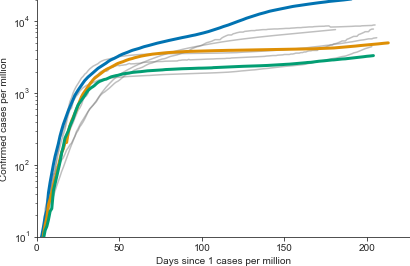

In [17]:
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='Confirmed pm', linewidth=3,
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False, palette='colorblind')
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Confirmed pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0)
plt.xlabel('Days since 1 cases per million')
plt.ylabel('Confirmed cases per million')
plt.ylim(1e1, 2e4)
plt.yscale('log')
sns.despine()
# plt.savefig(PATH+'confirmedpm.svg')

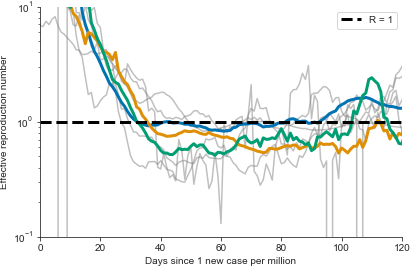

In [18]:
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='R', linewidth=3, palette='colorblind',
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='R', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0, 120)
plt.ylim(0.1, 10)
plt.plot([0, 200], [1, 1], 'k--', label='R = 1', lw=3)
plt.yscale('log')
plt.xlabel('Days since 1 new case per million')
plt.ylabel('Effective reproduction number')
plt.legend()
sns.despine()
# plt.savefig(PATH+'reff.svg')

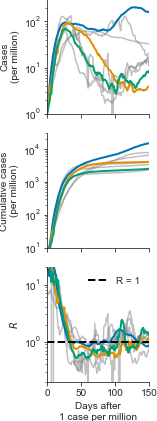

In [19]:
# plt.rc('text', usetex=True)
w = 0.4 * figwidth
fig, axs = plt.subplots(nrows=3, ncols=1, sharey=False, sharex=True, figsize=(w, 4/golden_ratio*w))
plt.sca(axs[0])
# plt.title('Cases (per mil)')
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', linewidth=2, palette='colorblind',
            y='Mean new cases pm', hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Mean new cases pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.ylim(1, 3e2)
plt.ylabel('')
plt.ylabel('Cases\n(per million)')
plt.yscale('log')
sns.despine()


plt.sca(axs[1])
# plt.title('Cumulative cases (per mil)')
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='Confirmed pm', linewidth=2, palette='colorblind',
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='Confirmed pm', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.ylabel('Cumulative cases\n(per million)')
# plt.ylabel('')
plt.ylim(1e1, 3e4)
plt.yscale('log')
sns.despine()


plt.sca(axs[2])
# plt.title('Reproduction number')
sns.lineplot(data=df.loc[df['Country'].isin(coloredcountries)], x='Shifted Date pm', y='R', linewidth=2, palette='colorblind',
            hue='Country', hue_order=coloredcountries, estimator=sum, ci=None, legend=False)
sns.lineplot(data=df.loc[df['Country'].isin(graycountries)], x='Shifted Date pm', palette=['Gray']*len(interesting_countries[3:]),
            alpha=0.5, y='R', hue='Country', hue_order=graycountries, estimator=sum, ci=None, legend=False, zorder=-1)
plt.xlim(0, 150)
plt.ylim(0.2, 20)
plt.plot([0, 200], [1, 1], 'k--', label='R = 1', lw=2)
plt.yscale('log')
plt.ylabel('$R$')
# plt.xlabel('')
# plt.ylabel('')
plt.xlabel('Days after\n1 case per million')
plt.legend(loc='upper right', frameon=False)
sns.despine()
plt.tight_layout()
# plt.savefig(PATH+'Fig1_1.svg')

In [20]:
dfd = df.loc[df.Country == 'Germany']

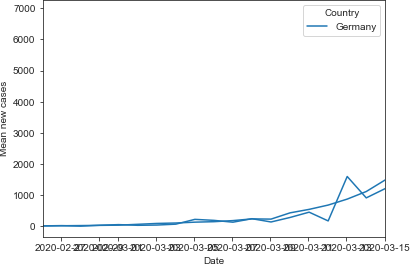

In [21]:
import datetime

sns.lineplot(data=df, x='Date', y='Mean new cases', hue='Country', hue_order=['Germany'], ci=None,
            legend='brief')
sns.lineplot(data=df, x='Date', y='New cases', hue='Country', hue_order=['Germany'], ci=None,
            legend=False)
# sb.scatterplot(data=df, x='Date', y='New cases pm', hue='Country', hue_order=interesting_countries, ci=None,
#             legend=False, linewidths=0, alpha=0.5)
# plt.yscale('log')
# plt.ylim(1, 1e2)
plt.xlim([datetime.date(2020, 2, 26), datetime.date(2020, 3, 15)])
# plt.xlim([datetime.date(2020, 3, 16), datetime.date(2020, 6, 6)])
# plt.xlim([t1, t2])
plt.show()

In [22]:
t1 = datetime.datetime(2020, 3, 16)
t2 = datetime.datetime(2020, 6, 6)
meancasespm_mar16_jun6 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['Mean new cases pm'].to_numpy()
casespm_mar16_jun6 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['New cases pm'].to_numpy()
cases_mar16_jun6 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['New cases'].to_numpy()
# np.save('casespm_de_mar16_jun21.npy', df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy())

In [23]:
t1 = datetime.datetime(2020, 2, 26)
t2 = datetime.datetime(2020, 3, 16)
meancases_feb26_mar15 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['Mean new cases'].to_numpy()
cases_feb26_mar15 = dfd[(dfd.Date < t2) & (dfd.Date > t1)]['New cases'].to_numpy()
# np.save('casespm_de_feb26_mar16.npy', df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy())

# np.save('cases_de_feb26_mar16.npy', df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases'].to_numpy())

In [24]:
t1 = datetime.datetime(2020, 6, 7)
t2 = datetime.datetime(2020, 9, 15)
meancasespm_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy()
casespm_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['New cases pm'].to_numpy()
meancases_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases'].to_numpy()

# casespm_jun7_sep15 = df[(df.Date < t2) & (df.Date > t1) & (df.Country == 'Germany')]['Mean new cases pm'].to_numpy()